In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# Generate some random data
data = pd.read_csv('../decision_tree/iris_dataset.csv')
X = data.drop(columns=['species'])
y = data['species']

<h4>• n_components: specifies that we want to reduce the data to n dimensions (in our case 2)</h4>
<h4>• perplexity: balances the attention given to local and global aspects of the data. Number of close neighbors each point considers during the dimensionality reduction process (in our case 30)</h4>

In [3]:
# Initialize t-SNE with hyperparameters
# Then transform the data into the 2-dimensional space using the fit_transform method
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000)
X_embedded = tsne.fit_transform(X)

In [4]:
# Create a DataFrame with the reduced dimensions and target labels
df = pd.DataFrame(X_embedded, columns=['Dimension 1', 'Dimension 2'])
df['Target'] = y

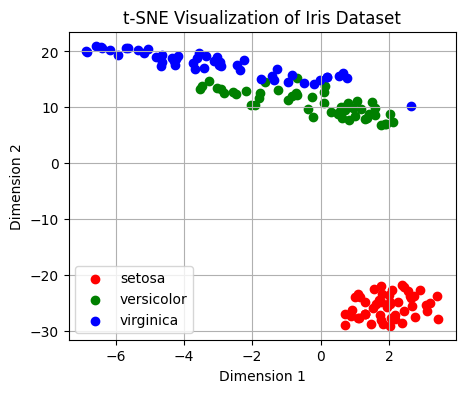

In [5]:
# Plot the results
plt.figure(figsize=(5, 4))
targets = np.unique(y)
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = df['Target'] == target
    plt.scatter(df.loc[indices_to_keep, 'Dimension 1'], df.loc[indices_to_keep, 'Dimension 2'], c=color, label=target)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization of Iris Dataset')
plt.legend(targets)
plt.grid(True)
plt.show()